In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Cleaned Data 

In [2]:
# Loading preprocessed book data
df = pd.read_csv('../data/processed/cleaned_books_balanced.csv')

# Features and labels
X_text = df['description']  # text descriptions
y = df['genre_label']       # encoded genre labels

print(f"Data loaded. Number of samples: {len(df)}")
print("Example descriptions:\n", X_text.head(3))


Data loaded. Number of samples: 9848
Example descriptions:
 0    On a soft summer night in Vermont, 12-year-old...
1    He broke her heart, and now he s back . . . Fr...
2    Seduced into an underworld of kinky intrigue.....
Name: description, dtype: object


### Train/Test Data Split

In [ ]:
# Spliting data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train_text)}, Testing samples: {len(X_test_text)}")


Training samples: 7878, Testing samples: 1970


### TF-IDF Vectorization

In [4]:
# Converting text descriptions into numeric features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

print("TF-IDF feature matrix shape:", X_train.shape)


TF-IDF feature matrix shape: (7878, 5000)


### Training Logistic Regression Model

In [5]:
# Initializing Logistic Regression model
lr_model = LogisticRegression(max_iter=500, random_state=42)

# Training model
lr_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


### Model Evaluation

Test Accuracy: 0.5878

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       246
           1       0.57      0.52      0.55       246
           2       0.39      0.41      0.40       246
           3       0.61      0.50      0.55       247
           4       0.54      0.50      0.52       246
           5       0.58      0.72      0.64       246
           6       0.60      0.53      0.56       247
           7       0.77      0.80      0.79       246

    accuracy                           0.59      1970
   macro avg       0.59      0.59      0.59      1970
weighted avg       0.59      0.59      0.59      1970



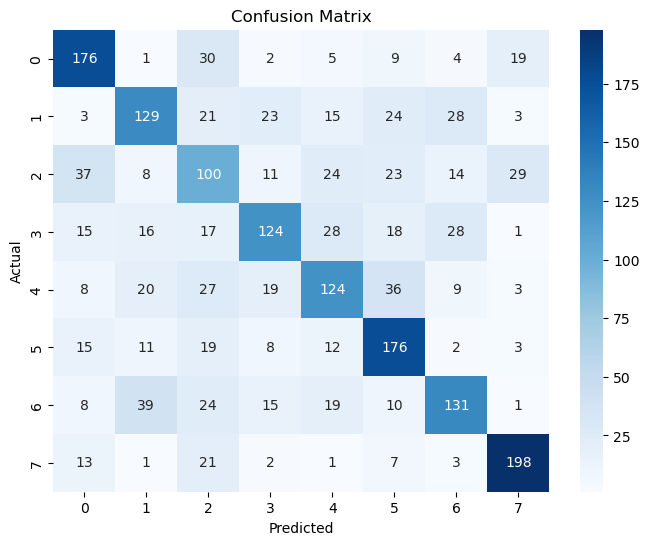

In [6]:
# Making predictions on test set
y_pred = lr_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
